<a href="https://colab.research.google.com/github/ASCCJR/ChallengeTelecomX/blob/main/_DESAFIO_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARTE 1**

# 📌 Extração de Dados

Esta seção é dedicada à extração e carregamento dos dados brutos em um DataFrame do Pandas.

In [1]:
# Importa as bibliotecas necessárias
import pandas as pd
import json
import requests

# Define a URL RAW do arquivo JSON no GitHub
json_url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json'

print(f"\nCarregando dados da URL: {json_url}")
try:
    # Faz a requisição HTTP para a URL
    response = requests.get(json_url)
    response.raise_for_status() # Lança um erro para status HTTP 4xx/5xx

    # Carrega o conteúdo JSON da resposta
    dados_json = json.loads(response.text)
    print("Arquivo JSON carregado via URL.")

    # Converte os dados JSON em um DataFrame do Pandas.
    dados_brutos = pd.DataFrame(dados_json)
    print("DataFrame inicial criado.")

    # Validação básica: verificar se as colunas esperadas estão presentes
    colunas_esperadas = ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
    missing_columns = [col for col in colunas_esperadas if col not in dados_brutos.columns]

    if missing_columns:
        print(f"AVISO: As seguintes colunas esperadas não foram encontradas: {', '.join(missing_columns)}")
        print("Isso pode indicar um problema na estrutura do arquivo JSON na URL.")
    else:
        print("Todas as colunas esperadas foram encontradas.")

    # Exibe as primeiras linhas para verificar a estrutura dos dados.
    print("\nVisualizando as 5 primeiras linhas:")
    display(dados_brutos.head())

except requests.exceptions.RequestException as e:
    print(f"ERRO de requisição HTTP: {e}. Verifique a URL ou sua conexão com a internet.")
except json.JSONDecodeError:
    print(f"ERRO: O conteúdo da URL '{json_url}' está corrompido ou não é um JSON válido.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")


Carregando dados da URL: https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json
Arquivo JSON carregado via URL.
DataFrame inicial criado.
Todas as colunas esperadas foram encontradas.

Visualizando as 5 primeiras linhas:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Comentario**

Ao olhar para o `head()` acima, a primeira coisa que notamos é que as colunas customer, phone, internet, e account não contêm valores simples como 'Yes' e 'No' ou '0' e '1'. Elas contêm dicionários (dados dentro de dados). Isso torna a análise direta impossível.

Nosso primeiro desafio é "desempacotar" ou "achatar" essas colunas. Uma ferramenta excelente para isso é o pandas.json_normalize.

# 🔧 Transformação de Dados

Nesta etapa, os dados brutos são processados e transformados para um formato adequado para análise e modelagem. Isso inclui a normalização de estruturas aninhadas, tratamento de valores ausentes e conversão de tipos de dados.

# ▶ **Dicionário de dados**

In [2]:
# Normalização de Estruturas Aninhadas
# Utiliza pd.json_normalize para  os dicionários aninhados das colunas 'customer', 'phone', 'internet' e 'account',
# transformando suas chaves em novas colunas no DataFrame principal.
dados_normalizados = pd.json_normalize(dados_json)
display(dados_normalizados.head())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
# Remoção de Linhas com Valores Ausentes (NaN)
# Remove todas as linhas que contêm pelo menos um valor NaN após a normalização.
dados_normalizados.dropna(inplace=True)

**Comentario**

Agora, em vez de uma única coluna "`customer`", temos "`customer.gender`", "`customer.SeniorCitizen`", etc. A estrutura está muito mais clara e pronta para a próxima fase da nossa investigação.

Nosso próximo passo será usar o comando `.info()` para ter uma visão geral dos tipos de dados e da contagem de valores em cada uma dessas novas colunas. Isso geralmente revela inconsistências.

In [4]:
# Diagnóstico do Tipo de Dados e Inconsistências
# O método .info() fornece um resumo do DataFrame, incluindo nomes de colunas,
# contagem de valores não-nulos e tipos de dados (Dtype).
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

- Muitas colunas são do tipo `object`: Colunas como Churn, `customer.gender`, `phone.PhoneService`, `account.Charges.Total`, etc., são todas classificadas como `object`. `object` geralmente significa que o Pandas está tratando a coluna como texto (string).

- Possíveis Problemas:
Para colunas como `Churn` ou` phone.PhoneService`, que contêm 'Yes' e 'No', object é esperado, mas precisaremos convertê-las para números (1 e 0) para fazer cálculos e análises.
Para colunas como `customer.tenure` (meses de contrato) e especialmente `account.Charges.Total` (gastos totais), o tipo object é um sinal de alerta. Esperávamos que fossem números (`int64` ou `float64`). O fato de não serem indica que provavelmente existem valores nessas colunas que não são números (como espaços em branco ou outros caracteres), o que está "contaminando" a coluna inteira.

In [5]:
# Verificar valores únicos em cada coluna
print("--- Verificando valores únicos por coluna ---")
for coluna in dados_normalizados.columns:
    print(f"\nColuna: {coluna}")
    print(dados_normalizados[coluna].unique())

--- Verificando valores únicos por coluna ---

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
['No' 'Yes' '']

Coluna: customer.gender
['Female' 'Male']

Coluna: customer.SeniorCitizen
[0 1]

Coluna: customer.Partner
['Yes' 'No']

Coluna: customer.Dependents
['Yes' 'No']

Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Coluna: phone.PhoneService
['Yes' 'No']

Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']

Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']

Coluna: internet.OnlineSecurity
['No' 'Yes' 'No internet service']

Coluna: internet.OnlineBackup
['Yes' 'No' 'No internet service']

Coluna: internet.DeviceProtection
['No' 'Yes' 'No internet service']

Coluna: internet.TechSupport
['Yes' 'No

# **Investigando a Coluna**
- `account.Charges.Total`

In [6]:
# Vamos tentar converter a coluna 'account.Charges.Total' para float.
# Esperamos um erro, pois sabemos que o tipo é 'object'. O erro nos dará a pista.
try:
    dados_normalizados['account.Charges.Total'].astype(float)
except ValueError as e:
    print("--- INVESTIGAÇÃO CONCLUída: ERRO ENCONTRADO ---")
    print(f"A conversão falhou com a seguinte mensagem de erro:\n-> {e}")

--- INVESTIGAÇÃO CONCLUída: ERRO ENCONTRADO ---
A conversão falhou com a seguinte mensagem de erro:
-> could not convert string to float: ' '


Agora sabemos, com certeza, que o problema são strings que contêm apenas um espaço em branco (`' '`). Esses espaços não são números e, portanto, a coluna inteira foi classificada como `object`

- Faremos a conversão para numérico novamente, mas desta vez usaremos o parâmetro `errors='coerce'`.
- Isso dirá ao Pandas: "tente converter para número e, se você encontrar um valor que não pode ser convertido (como o `' '`), transforme-o em `NaN` (Not a Number), que é o marcador padrão do Pandas para dados ausentes."
- Depois da conversão, vamos verificar se os `NaNs` foram realmente criados.
- Finalmente, decidiremos o que fazer com as linhas que contêm esses dados ausentes.

In [7]:
# Etapa: Conversão segura de account.Charges.Total com to_numeric(..., errors='coerce')
# Ação 1: Usar 'coerce' para transformar os valores inválidos em Nulos (NaN)
print("1. Convertendo a coluna 'account.Charges.Total' para um formato numérico...")
dados_normalizados['account.Charges.Total'] = pd.to_numeric(dados_normalizados['account.Charges.Total'], errors='coerce')
print("   Conversão concluída. Valores problemáticos agora são 'NaN'.")

1. Convertendo a coluna 'account.Charges.Total' para um formato numérico...
   Conversão concluída. Valores problemáticos agora são 'NaN'.


In [8]:
# Etapa: Contagem e remoção dos NaN gerados em account.Charges.Total
# Verificação 1: Vamos confirmar quantos valores nulos foram criados.
# Esperamos que o número seja diferente de zero agora.
print("\n2. Investigando: Contando valores nulos na coluna...")
nulos_encontrados = dados_normalizados['account.Charges.Total'].isnull().sum()
print(f"   Descoberta: Encontrado(s) {nulos_encontrados} valor(es) nulo(s).")


2. Investigando: Contando valores nulos na coluna...
   Descoberta: Encontrado(s) 11 valor(es) nulo(s).


In [9]:
# Ação: Como são poucos dados (comparado ao total), e não temos como saber o valor correto,
# a abordagem mais segura é remover as linhas com esses dados faltantes.
print("\n3. Ação: Removendo as linhas com valores nulos...")
dados_normalizados.dropna(subset=['account.Charges.Total'], inplace=True)
print("   Linhas removidas.")


3. Ação: Removendo as linhas com valores nulos...
   Linhas removidas.


In [10]:
# Verificação: Vamos confirmar que a coluna agora está 100% limpa e com o tipo correto.
print("\n4. Verificação Final:")
print("   Contagem de nulos agora:", dados_normalizados['account.Charges.Total'].isnull().sum())
print("   Novo tipo de dado da coluna:", dados_normalizados['account.Charges.Total'].dtype)


4. Verificação Final:
   Contagem de nulos agora: 0
   Novo tipo de dado da coluna: float64


In [11]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   object 
 5   customer.Dependents        7256 non-null   object 
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   object 
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.

# **Investigando a Coluna**
- `Churn`

In [12]:
# Etapa: Investigação e limpeza da coluna Churn (valores em branco)
# Vamos contar a frequência de cada valor único na coluna 'Churn'.
# Isso é fundamental para entender a nossa variável alvo.
print("--- Investigando a coluna 'Churn' ---")
print(dados_normalizados['Churn'].value_counts())

--- Investigando a coluna 'Churn' ---
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64


In [13]:
# Ação: Filtrar o DataFrame para remover os 224 registros onde 'Churn' é uma string vazia.
linhas_antes = len(dados_normalizados)
dados_normalizados = dados_normalizados[dados_normalizados['Churn'] != ''].copy()
linhas_depois = len(dados_normalizados)
print(f"Ação de Limpeza: {linhas_antes - linhas_depois} linhas foram removidas.")

# Ao adicionar .copy(), forçamos o Pandas a criar
# uma cópia explícita do DataFrame filtrado, garantindo que todas as operações subsequentes (como o inplace=True em dropna ou outras transformações)
# afetem apenas essa nova cópia, evitando assim os avisos e garantindo a consistência dos resultados.

Ação de Limpeza: 224 linhas foram removidas.


In [14]:
# Verificação: Vamos conferir o resultado final da coluna 'Churn'
print("\n--- Verificação Pós-Transformação de 'Churn' ---")
print("Valores e contagens em 'Churn' após a limpeza:")
print(dados_normalizados['Churn'].value_counts())
print("\nTipo de dado da coluna 'Churn':", dados_normalizados['Churn'].dtype)


--- Verificação Pós-Transformação de 'Churn' ---
Valores e contagens em 'Churn' após a limpeza:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Tipo de dado da coluna 'Churn': object


In [15]:
# Mapear 'Yes' para 1 e 'No' para 0 na coluna 'Churn'
print("Mapeando 'Yes' para 1 e 'No' para 0 na coluna 'Churn'...")
pd.set_option('future.no_silent_downcasting', True)
dados_normalizados['Churn'] = dados_normalizados['Churn'].replace({'Yes': 1, 'No': 0})
# Converter a coluna 'Churn' para tipo int
dados_normalizados['Churn'] = dados_normalizados['Churn'].astype(int)
print("Mapeamento e conversão para int concluídos.")

# Verificar o resultado
print("\nValores e contagens em 'Churn' após o mapeamento:")
print(dados_normalizados['Churn'].value_counts())
print("\nNovo tipo de dado da coluna 'Churn':", dados_normalizados['Churn'].dtype)

Mapeando 'Yes' para 1 e 'No' para 0 na coluna 'Churn'...
Mapeamento e conversão para int concluídos.

Valores e contagens em 'Churn' após o mapeamento:
Churn
0    5163
1    1869
Name: count, dtype: int64

Novo tipo de dado da coluna 'Churn': int64


In [16]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.

# **Investigando a Coluna**
- `phone.MultipleLines`

In [17]:
# Etapa 9: Investigação de colunas específicas
# Vamos investigar o conteúdo da coluna 'phone.MultipleLines' para ver quais são os valores possíveis.
print("--- Investigando a coluna 'phone.MultipleLines' ---")
print("Valores únicos e suas contagens:")
print(dados_normalizados['phone.MultipleLines'].value_counts())

--- Investigando a coluna 'phone.MultipleLines' ---
Valores únicos e suas contagens:
phone.MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


Descobertas:

- Encontramos os valores 'Yes' e 'No', como esperado.
- Descobrimos um terceiro valor: 'No phone service'. Isso é crucial. Significa que não podemos simplesmente mapear 'Yes' para 1 e 'No' para 0, pois precisamos decidir o que fazer com essa terceira categoria.
- Nosso plano deve ser:
- Mapear 'Yes' para 1.
- Mapear tanto 'No' quanto 'No phone service' para 0.

In [18]:
# Ação: Filtrar o DataFrame E criar uma cópia explícita para evitar avisos futuros.
linhas_antes = len(dados_normalizados)
dados_normalizados = dados_normalizados[dados_normalizados['Churn'] != ''].copy()
linhas_depois = len(dados_normalizados)
print(f"Ação de Limpeza: {linhas_antes - linhas_depois} linhas foram removidas.")

Ação de Limpeza: 0 linhas foram removidas.


In [19]:
#Mapeamento da coluna phone.MultipleLines para valores numéricos

# Define o mapeamento específico para 'phone.MultipleLines'.
# 'Yes' vai para 1, 'No' e 'No phone service' vão para 0.
mapa_multiple_lines = {'Yes': 1, 'No': 0, 'No phone service': 0}

# Aplica o mapeamento à coluna.
dados_normalizados['phone.MultipleLines'] = dados_normalizados['phone.MultipleLines'].map(mapa_multiple_lines)

print("Mapeamento da coluna 'phone.MultipleLines' concluído.")

Mapeamento da coluna 'phone.MultipleLines' concluído.


In [20]:
# Verificação: Vamos conferir se a transformação funcionou como o esperado.
print("\nValores e contagens após o mapeamento:")
print(dados_normalizados['phone.MultipleLines'].value_counts())
print("\nNovo tipo de dado da coluna:", dados_normalizados['phone.MultipleLines'].dtype)


Valores e contagens após o mapeamento:
phone.MultipleLines
0    4065
1    2967
Name: count, dtype: int64

Novo tipo de dado da coluna: int64


In [21]:
# O método .info() nos dá um resumo do DataFrame.
# Ele mostra o nome de cada coluna, a quantidade de valores não-nulos e o tipo de dado (Dtype).
print("--- Resumo e Tipos de Dados das Colunas ---")
dados_normalizados.info()

--- Resumo e Tipos de Dados das Colunas ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   int64  
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.

# **Investigando as Colunas**
- `internet.OnlineSecurity`
- `internet.OnlineBackup`
- `internet.DeviceProtection`
- `internet.TechSupport`
- `internet.StreamingTV`
- `internet.StreamingMovies`



In [22]:
# Investigação: Vamos ver os valores únicos da coluna de Segurança Online.
print("--- Investigando a coluna 'internet.OnlineSecurity' ---")
print(dados_normalizados['internet.OnlineSecurity'].value_counts())

--- Investigando a coluna 'internet.OnlineSecurity' ---
internet.OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


Descoberta:
- O padrão se repete. Temos 'Yes', 'No', e a categoria 'No internet service'.
- Assim como antes, quem não tem internet não tem o serviço de segurança online, então podemos tratar 'No internet service' da mesma forma que 'No'.

In [23]:
# Investigação: Vamos ver os valores únicos da coluna de Backup Online.
print("--- Investigando: internet.OnlineBackup ---")
print(dados_normalizados['internet.OnlineBackup'].value_counts())

--- Investigando: internet.OnlineBackup ---
internet.OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


In [24]:
# Investigação: E a coluna de Proteção de Dispositivo?
print("\n--- Investigando: internet.DeviceProtection ---")
print(dados_normalizados['internet.DeviceProtection'].value_counts())


--- Investigando: internet.DeviceProtection ---
internet.DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64


In [25]:
# Investigação: E a coluna de Suporte Técnico?
print("\n--- Investigando: internet.TechSupport ---")
print(dados_normalizados['internet.TechSupport'].value_counts())


--- Investigando: internet.TechSupport ---
internet.TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64


In [26]:
# Investigação: E a coluna de StreamingTV?
print("\n--- Investigando: internet.StreamingTV ---")
print(dados_normalizados['internet.StreamingTV'].value_counts())


--- Investigando: internet.StreamingTV ---
internet.StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64


In [27]:
# Investigação: E a coluna de StreamingMovies?
print("\n--- Investigando: internet.StreamingMovies ---")
print(dados_normalizados['internet.StreamingMovies'].value_counts())


--- Investigando: internet.StreamingMovies ---
internet.StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64


**Comentario**
- Agora que provamos que o padrão se repete, podemos criar uma única célula de ação para aplicar a transformação a todas essas colunas de serviço de uma vez, além das colunas binárias simples que também precisam ser tratadas.

In [28]:
# Ação: Mapeamento de Colunas Binárias e de Serviço para Valores Numéricos (0 e 1)

# Define o mapeamento para as colunas de serviço (onde 'No internet service' se comporta como 'No').
colunas_de_servico = [
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]
mapa_servico = {'Yes': 1, 'No': 0, 'No internet service': 0}

# Aplica o mapeamento a cada coluna de serviço.
for coluna in colunas_de_servico:
    dados_normalizados[coluna] = dados_normalizados[coluna].map(mapa_servico)

# Define o mapeamento para colunas binárias simples ('Yes'/'No').
colunas_simples_sim_nao = [
    'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling'
]
mapa_simples = {'Yes': 1, 'No': 0}

# Aplica o mapeamento a cada coluna binária simples.
for coluna in colunas_simples_sim_nao:
    dados_normalizados[coluna] = dados_normalizados[coluna].map(mapa_simples)

print("Mapeamento de colunas binárias e de serviço concluído.")

# Verificação: Exibe as primeiras linhas para confirmar as transformações.
print("\nVisualizando o DataFrame com as colunas transformadas:")
display(dados_normalizados.head())

# Re-verifica os tipos de dados após todas as transformações para garantir que estão corretos.
print("\n--- Resumo dos Tipos de Dados Pós-Mapeamento ---")
dados_normalizados.info()

Mapeamento de colunas binárias e de serviço concluído.

Visualizando o DataFrame com as colunas transformadas:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40



--- Resumo dos Tipos de Dados Pós-Mapeamento ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   int64  
 5   customer.Dependents        7032 non-null   int64  
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   int64  
 8   phone.MultipleLines        7032 non-null   int64  
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   int64  
 11  internet.OnlineBackup      7032 non-null   int64  
 12  internet.DeviceProtection  7032 non-null   int64  
 13  int

# **Investigando as Colunas**
- `customer.gender`
- `internet.InternetService`
- `account.PaymentMethod`
- `account.Contract`

In [29]:
# Investigação: Vamos ver os valores da coluna de gênero.
print("--- Investigando: customer.gender ---")
print(dados_normalizados['customer.gender'].value_counts())

--- Investigando: customer.gender ---
customer.gender
Male      3549
Female    3483
Name: count, dtype: int64


Descoberta: Ao executar, descobrimos que a coluna contém `Male `e `Female`. É uma coluna categórica com duas opções.

In [30]:
# Investigação: E a coluna de serviço de internet?
print("\n--- Investigando: internet.InternetService ---")
print(dados_normalizados['internet.InternetService'].value_counts())


--- Investigando: internet.InternetService ---
internet.InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


Descoberta: Descobrimos que existem três categorias: `Fiber optic`, `DSL`, e `No`.

In [31]:
# Investigação: Por fim, a coluna de método de pagamento.
print("\n--- Investigando: account.PaymentMethod ---")
print(dados_normalizados['account.PaymentMethod'].value_counts())


--- Investigando: account.PaymentMethod ---
account.PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


Descoberta: Descobrimos quatro categorias: `Electronic check`, `Mailed check`, `Bank transfer (automatic)`, e `Credit card (automatic)`.

In [32]:
# Investigação: E a coluna de tipo de contrato?
print("\n--- Investigando: account.Contract ---")
print(dados_normalizados['account.Contract'].value_counts())


--- Investigando: account.Contract ---
account.Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64


Plano de Ação: Codificação de Variáveis Categóricas (One-Hot Encoding)

- Para colunas com múltiplas categorias como essas, não podemos simplesmente mapeá-las para 0, 1, 2, etc., pois isso criaria uma falsa relação de ordem (por exemplo, "Two year" (2) seria considerado "maior" que "One year" (1)).

- A abordagem correta é o One-Hot Encoding. Ele transforma cada categoria em sua própria coluna com valores 0 ou 1. Por exemplo, a coluna account.Contract se transformará em três novas colunas: account.Contract_Month-to-month, account.Contract_One year, e account.Contract_Two year. Se um cliente tiver um contrato mensal, ele terá o valor 1 na primeira coluna e 0 nas outras duas.

- A função pd.get_dummies() faz isso perfeitamente para nós.

# **Plano de Ação: Codificação de Variáveis Categóricas (One-Hot Encoding)**
- `customer.gender`
- `internet.InternetService`
- `account.PaymentMethod`
- `account.Contract`

In [33]:
# Ação 1: Aplicar One-Hot Encoding para Variáveis Categóricas Nominais

print("1. Aplicando One-Hot Encoding às colunas categóricas selecionadas...")
colunas_categoricas_ohe = [ # Lista de colunas a serem transformadas via One-Hot Encoding.
    'customer.gender',
    'internet.InternetService',
    'account.Contract',
    'account.PaymentMethod'
]

1. Aplicando One-Hot Encoding às colunas categóricas selecionadas...


In [34]:
# pd.get_dummies cria novas colunas binárias para cada categoria.
# 'drop_first=False' mantém todas as categorias, o que é útil para análise descritiva inicial.
df_transformado = pd.get_dummies(
    dados_normalizados,
    columns=colunas_categoricas_ohe,
    drop_first=False
)
print("   One-Hot Encoding concluído.")

   One-Hot Encoding concluído.


In [35]:
dados_normalizados.info()

# Verificar os valores únicos das colunas criadas pelo get_dummies
print("\n--- Verificando valores das colunas criadas por get_dummies ---")
colunas_dummies = [
    'customer.gender_Female', 'customer.gender_Male',
    'internet.InternetService_DSL', 'internet.InternetService_Fiber optic', 'internet.InternetService_No',
    'account.Contract_Month-to-month', 'account.Contract_One year', 'account.Contract_Two year',
    'account.PaymentMethod_Bank transfer (automatic)', 'account.PaymentMethod_Credit card (automatic)',
    'account.PaymentMethod_Electronic check', 'account.PaymentMethod_Mailed check'
]

for coluna in colunas_dummies:
    if coluna in df_transformado.columns:
        print(f"\nColona: {coluna}")
        print(df_transformado[coluna].value_counts())
    else:
        print(f"\nColona: {coluna} não encontrada no DataFrame transformado.")

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   int64  
 5   customer.Dependents        7032 non-null   int64  
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   int64  
 8   phone.MultipleLines        7032 non-null   int64  
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   int64  
 11  internet.OnlineBackup      7032 non-null   int64  
 12  internet.DeviceProtection  7032 non-null   int64  
 13  internet.TechSupport       7032 non-null   int64  
 1

Comentario: A verificação com .value_counts() confirma que as colunas criadas pelo get_dummies contêm apenas valores True e False, como esperado. Aparentemente não temos "falsos non-nulls" nessas colunas.

In [36]:
# Converter colunas booleanas (True/False) para inteiros (1/0)
print("Convertendo colunas booleanas para inteiros (1/0)...")

# Seleciona apenas as colunas que são do tipo booleano (True/False)
colunas_booleanas = df_transformado.select_dtypes(include='bool').columns

# Converte as colunas booleanas selecionadas para tipo int
df_transformado[colunas_booleanas] = df_transformado[colunas_booleanas].astype(int)

print("Conversão concluída.")

# Verificação: Mostra os tipos de dados para confirmar a conversão
print("\n--- Tipos de Dados Após a Conversão de Boolean para Int ---")
df_transformado.info()

Convertendo colunas booleanas para inteiros (1/0)...
Conversão concluída.

--- Tipos de Dados Após a Conversão de Boolean para Int ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   customerID                                       7032 non-null   object 
 1   Churn                                            7032 non-null   int64  
 2   customer.SeniorCitizen                           7032 non-null   int64  
 3   customer.Partner                                 7032 non-null   int64  
 4   customer.Dependents                              7032 non-null   int64  
 5   customer.tenure                                  7032 non-null   int64  
 6   phone.PhoneService                               7032 non-null   int64  
 7   phone.MultipleLines                              7032 no

In [37]:
# Identificar e analisar colunas numéricas que não são binárias esperadas

print("--- Analisando colunas numéricas (não binárias esperadas) ---")

# Lista de colunas que *deveriam* ser binárias (para exclusão)
colunas_binarias_int = [
    'Churn',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling',
    'customer.gender_Female',
    'customer.gender_Male',
    'internet.InternetService_DSL',
    'internet.InternetService_Fiber optic',
    'internet.InternetService_No',
    'account.Contract_Month-to-month',
    'account.Contract_One year',
    'account.Contract_Two year',
    'account.PaymentMethod_Bank transfer (automatic)',
    'account.PaymentMethod_Credit card (automatic)',
    'account.PaymentMethod_Electronic check',
    'account.PaymentMethod_Mailed check'
]

# Selecionar todas as colunas numéricas (int64 e float64)
colunas_numericas = df_transformado.select_dtypes(include=['int64', 'float64']).columns

# Filtrar as colunas numéricas para excluir as que são esperadas como binárias
colunas_para_analisar = [col for col in colunas_numericas if col not in colunas_binarias_int]

if colunas_para_analisar:
    print("\nColunas numéricas para análise:")
    for coluna in colunas_para_analisar:
        print(f"- {coluna}")

    # Exibir estatísticas descritivas para essas colunas
    print("\n--- Estatísticas Descritivas ---")
    display(df_transformado[colunas_para_analisar].describe())

else:
    print("\nNão foram encontradas colunas numéricas para analisar além das esperadas como binárias.")

--- Analisando colunas numéricas (não binárias esperadas) ---

Colunas numéricas para análise:
- customer.tenure
- account.Charges.Monthly
- account.Charges.Total

--- Estatísticas Descritivas ---


,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# ⚪ **Refinamento**

In [38]:
# Definir 'customerID' como o índice do DataFrame

# Define a coluna 'customerID' como o índice do DataFrame.
# Isso é uma boa prática para identificação única de registros e evita que 'customerID' seja tratada como uma feature para modelos.
print("\n2. Definindo 'customerID' como o índice do DataFrame...")
if 'customerID' in df_transformado.columns:
    df_transformado.set_index('customerID', inplace=True)
print("   'customerID' definido como índice.")

# Verificar o DataFrame após definir o índice
print("\n--- DataFrame após definir 'customerID' como índice ---")
display(df_transformado.head())
print("\n--- Tipos de Dados Após definir o índice ---")
df_transformado.info()


2. Definindo 'customerID' como o índice do DataFrame...
   'customerID' definido como índice.

--- DataFrame após definir 'customerID' como índice ---


,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,...,internet.InternetService_DSL,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
0003-MKNFE,0,0,0,0,9,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
0004-TLHLJ,1,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
0011-IGKFF,1,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
0013-EXCHZ,1,1,1,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1



--- Tipos de Dados Após definir o índice ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7032 non-null   int64  
 1   customer.SeniorCitizen                           7032 non-null   int64  
 2   customer.Partner                                 7032 non-null   int64  
 3   customer.Dependents                              7032 non-null   int64  
 4   customer.tenure                                  7032 non-null   int64  
 5   phone.PhoneService                               7032 non-null   int64  
 6   phone.MultipleLines                              7032 non-null   int64  
 7   internet.OnlineSecurity                          7032 non-null   int64  
 8   internet.OnlineBackup                            703

# ▶ **Análise Descritiva**

In [39]:
# Análise Descritiva: Variáveis Numéricas Contínuas

print("--- Estatísticas Descritivas para Variáveis Numéricas Chave ---")
# Gera estatísticas descritivas (contagem, média, desvio padrão, mínimo, quartis, máximo)
# para as colunas numéricas de interesse.
colunas_continuas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
display(df_transformado[colunas_continuas].describe())

--- Estatísticas Descritivas para Variáveis Numéricas Chave ---


,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## **Interpretação da Análise**

Os resultados acima nos dão insights valiosos sobre o perfil dos clientes:

**Meses de Contrato (Tenure):**
- A média de meses de contrato é de aproximadamente 32.4 meses, com um desvio padrão de 24.5. Isso indica uma dispersão considerável, sugerindo que temos tanto clientes novos quanto clientes de longa data.
- O mínimo é 1 mês e o máximo é 72 meses, confirmando essa ampla gama.
- A mediana (50%) de 29 meses está próxima da média, mas o 3º quartil (75%) em 55 meses e o valor máximo mostram que há um grupo significativo de clientes leais com contratos mais longos.

**Gasto Mensal (account.Charges.Monthly):**
- O gasto mensal médio é de cerca de 64.8, com um desvio padrão de 30.1.
- A distribuição parece ser relativamente ampla, com o mínimo em 18.25 e o máximo em 118.75.
- A mediana (70.35) é um pouco maior que a média, o que pode sugerir uma leve assimetria ou a presença de outliers de valores mais altos, embora as estatísticas descritivas não indiquem outliers extremos.

**Gasto Total (account.Charges.Total):**
- O gasto total médio é de aproximadamente 2283.3, com um desvio padrão alto de 2266.8. Isso é um forte indicativo de que esta coluna tem uma distribuição bastante dispersa e provavelmente assimétrica.
- O valor mínimo (18.8) e o máximo (8684.8) confirmam a grande variação no gasto total entre os clientes.
- O 1º quartil (25%) está em 401.45 e a mediana (50%) em 1397.47, ambos significativamente menores que a média. Esta é uma indicação clara de assimetria positiva: a maioria dos clientes tem um gasto total menor, enquanto alguns poucos clientes com gastos muito altos puxam a média para cima. Isso é comum em dados de receita ou gasto, onde uma pequena porcentagem de clientes contribui com uma grande parte do total.

## Criando Variáveis Adicionais para Análise

In [40]:
# Feature Engineering: Criação da Variável 'Total_Services'

# Importa bibliotecas para visualização.
import matplotlib.pyplot as plt
import seaborn as sns

# Lista das colunas que representam serviços (onde 1 significa que o cliente tem o serviço).
# Excluímos 'PhoneService' pois 'MultipleLines' já indica se o cliente tem serviço de telefone.
colunas_servicos = [
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

# Soma os valores (0 ou 1) dessas colunas para criar a nova variável 'Total_Services'.
# Esta variável contará quantos serviços adicionais (além do serviço básico de internet ou telefone)
# cada cliente possui.
df_transformado['Total_Services'] = df_transformado[colunas_servicos].sum(axis=1)

print("Variável 'Total_Services' criada com sucesso.")

# Opcional: Exibir as primeiras linhas com a nova coluna para verificar.
print("\nVisualizando o DataFrame com a nova coluna 'Total_Services':")
display(df_transformado.head())

# Opcional: Verificar a distribuição da nova variável.
print("\nDistribuição da variável 'Total_Services':")
print(df_transformado['Total_Services'].value_counts().sort_index())

# Opcional: Verificar o tipo de dado da nova coluna.
print("\nTipo de dado da coluna 'Total_Services':", df_transformado['Total_Services'].dtype)

Variável 'Total_Services' criada com sucesso.

Visualizando o DataFrame com a nova coluna 'Total_Services':


,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,...,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,Total_Services
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,9,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,3
0003-MKNFE,0,0,0,0,9,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,2
0004-TLHLJ,1,0,0,0,4,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
0011-IGKFF,1,1,1,0,13,1,0,0,1,1,...,1,0,1,0,0,0,0,1,0,4
0013-EXCHZ,1,1,1,0,3,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,2



Distribuição da variável 'Total_Services':
Total_Services
0    1663
1    1156
2     957
3     978
4     931
5     719
6     420
7     208
Name: count, dtype: int64

Tipo de dado da coluna 'Total_Services': int64


# (Gráfico) Taxa de Churn por Tipo de Contrato

In [41]:
# Análise Visual: Taxa de Churn por Tipo de Contrato

# Prepara os dados para o gráfico: calcula a taxa de churn para cada tipo de contrato.
churn_por_contrato = df_transformado.groupby('account.Contract_Month-to-month')['Churn'].value_counts(normalize=True).unstack()

# Calcula a taxa de churn (proporção de 'Yes')
churn_rate_por_contrato = churn_por_contrato[1] * 100

print("Taxa de Churn por Tipo de Contrato (Month-to-month):")
print(churn_rate_por_contrato)

Taxa de Churn por Tipo de Contrato (Month-to-month):
account.Contract_Month-to-month
0     6.778587
1    42.709677
Name: 1, dtype: float64


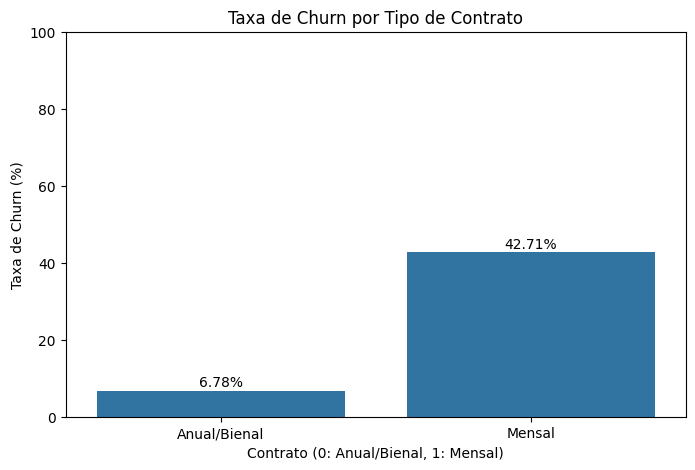

In [42]:
# Cria o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_rate_por_contrato.index, y=churn_rate_por_contrato.values)

# Configurações do gráfico
plt.title('Taxa de Churn por Tipo de Contrato')
plt.xlabel('Contrato (0: Anual/Bienal, 1: Mensal)')
plt.ylabel('Taxa de Churn (%)')
plt.xticks([0, 1], ['Anual/Bienal', 'Mensal']) # Rotula os eixos x para clareza
plt.ylim(0, 100) # Define o limite do eixo y de 0 a 100%

# Adiciona os valores da taxa de churn acima das barras
for i, v in enumerate(churn_rate_por_contrato.values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.show()

**Interpretação do Gráfico: Taxa de Churn por Tipo de Contrato**

Este gráfico de barras mostra a taxa de churn para diferentes tipos de contrato: Anual/Bienal (combinando contratos de um e dois anos) e Mensal.

- **Contratos Anuais/Bienais:** A taxa de churn para clientes com contratos de um ou dois anos é significativamente baixa, em torno de 6.78%. Isso sugere que clientes com contratos de longo prazo são muito mais propensos a permanecer com a empresa.
- **Contratos Mensais:** Em contraste, clientes com contratos mensais apresentam uma taxa de churn consideravelmente mais alta, atingindo 42.71%. Esta é uma diferença acentuada e indica que clientes sem um compromisso de longo prazo são o grupo de maior risco para churn.

**Conclusão:** O tipo de contrato é um forte preditor de churn. Clientes com contratos mensais são muito mais propensos a deixar a operadora do que aqueles com contratos anuais ou bienais. Estratégias de retenção focadas em converter clientes mensais para contratos mais longos podem ser muito eficazes.

# (Gráfico) Taxa de Churn por Total de Serviços Contratados

In [43]:
# Análise Visual: Taxa de Churn por Número de Serviços Contratados

# Agrupa os dados pelo 'Total_Servicos' e calcula a taxa média de churn.
# Multiplica por 100 para obter a taxa em porcentagem.
churn_por_servicos = df_transformado.groupby('Total_Services')['Churn'].mean() * 100

print("Taxa de Churn por Número de Serviços Contratados:")
print(churn_por_servicos)

Taxa de Churn por Número de Serviços Contratados:
Total_Services
0    20.805773
1    34.515571
2    37.722048
3    31.288344
4    25.778733
5    21.835883
6    11.666667
7     5.288462
Name: Churn, dtype: float64


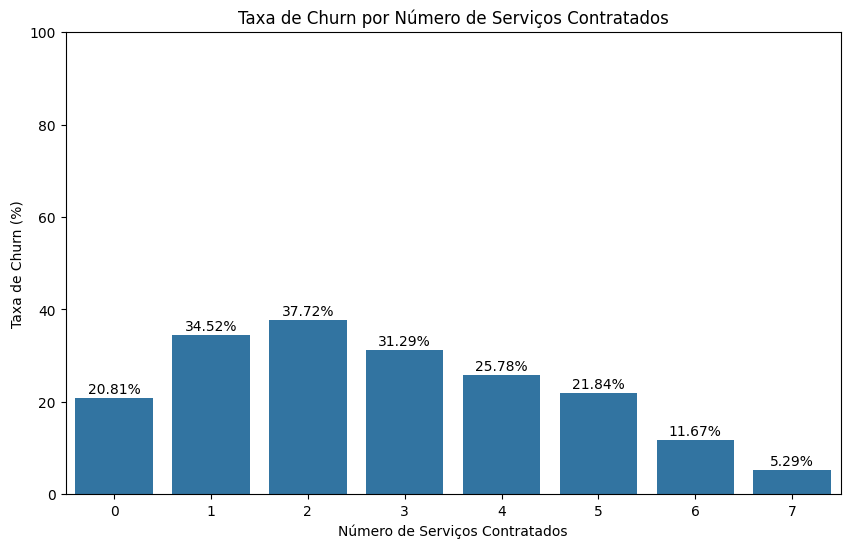

In [44]:
# Cria o gráfico de barras para a taxa de churn por número de serviços
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_por_servicos.index, y=churn_por_servicos.values, color=sns.color_palette()[0])

# Configurações do gráfico
plt.title('Taxa de Churn por Número de Serviços Contratados')
plt.xlabel('Número de Serviços Contratados')
plt.ylabel('Taxa de Churn (%)')
plt.ylim(0, 100) # Define o limite do eixo y de 0 a 100%

# Adiciona os valores da taxa de churn acima das barras
for i, v in enumerate(churn_por_servicos.values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.show()

**Interpretação do Gráfico: Taxa de Churn por Número de Serviços Contratados**

O gráfico de barras acima revela uma relação interessante entre o número de serviços contratados e a taxa de churn dos clientes:

- **Baixo Número de Serviços (0-2):** Clientes com um baixo número de serviços (0, 1 ou 2) tendem a ter taxas de churn mais altas, atingindo um pico em torno de 37.72% para clientes com 2 serviços. Isso sugere que clientes com poucos serviços podem estar menos "engajados" ou encontrar menos valor na operadora, tornando-os mais propensos a sair.
- **Número Moderado de Serviços (3-5):** À medida que o número de serviços aumenta para 3, 4 e 5, a taxa de churn começa a diminuir gradualmente. Isso indica que clientes que contratam mais serviços podem estar mais satisfeitos, mais dependentes da operadora, ou encontrar uma melhor relação custo-benefício.
- **Alto Número de Serviços (6-7):** Clientes com um alto número de serviços (6 ou 7) apresentam as taxas de churn significativamente mais baixas. Clientes com 7 serviços têm a menor taxa de churn, em torno de 5.29%. Isso sugere que clientes com muitos serviços são altamente leais e provavelmente encontraram um pacote que atende bem às suas necessidades, tornando a mudança para outra operadora menos atraente.

**Conclusão:** Há uma clara tendência de diminuição da taxa de churn à medida que o número de serviços contratados aumenta. Clientes com poucos serviços representam um grupo de maior risco de churn, enquanto aqueles com muitos serviços são mais estáveis. Isso pode ser um insight valioso para estratégias de retenção, focando em incentivar clientes com poucos serviços a adicionarem mais ou oferecendo pacotes mais atraentes para esse grupo.

# (Gráfico) Matriz de Correlação com o Churn

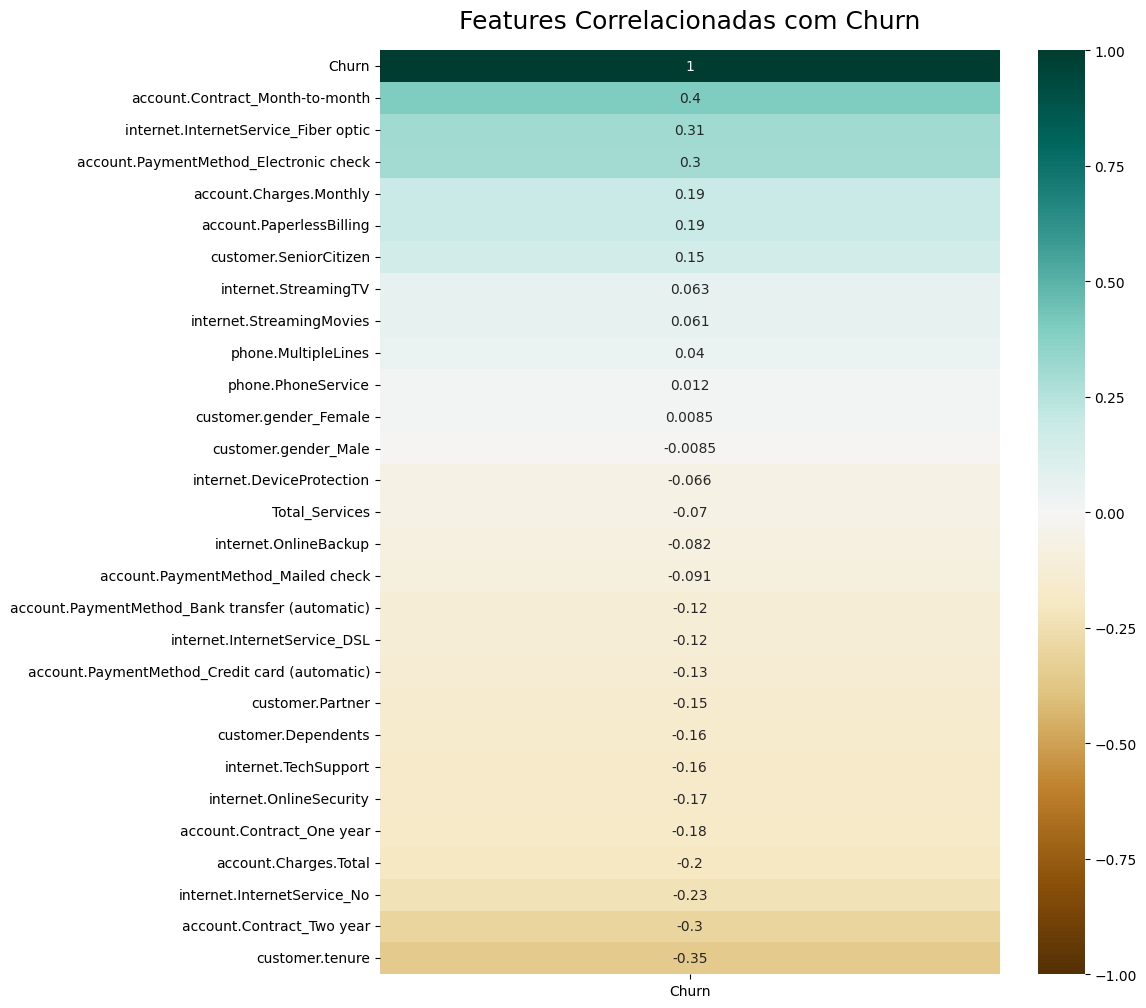

In [45]:
# Análise de Correlação: Heatmap com a Variável Alvo 'Churn'

plt.figure(figsize=(10, 12))
# Calcula a matriz de correlação do DataFrame e filtra para mostrar apenas as correlações com 'Churn'.
# Ordena os valores para visualizar facilmente os fatores mais correlacionados (positiva ou negativamente).
heatmap = sns.heatmap(
    df_transformado.corr(numeric_only=True)[['Churn']].sort_values(by='Churn', ascending=False),
    vmin=-1, vmax=1, annot=True, cmap='BrBG'
)

heatmap.set_title('Features Correlacionadas com Churn', fontdict={'fontsize':18}, pad=16);

**Interpretação do Heatmap de Correlação com Churn**

Este heatmap visualiza a correlação entre as diversas features do dataset e a variável alvo `Churn`. A cor e o valor em cada célula indicam a força e a direção da correlação (valores próximos a 1 ou -1 indicam forte correlação, valores próximos a 0 indicam pouca correlação).

Observações Principais:

- **Fortes Correlações Positivas (Mais propenso a Churn):**
    - `account.Contract_Month-to-month`: A correlação mais forte e positiva (0.4). Clientes com contratos mensais têm uma probabilidade significativamente maior de churn. Isso reforça o insight do gráfico anterior.
    - `internet.InternetService_Fiber optic`: Clientes com serviço de internet fibra óptica também apresentam uma correlação positiva notável (0.31) com churn. Isso pode indicar que, embora seja um serviço de alta velocidade, pode haver questões de satisfação (preço, interrupções, etc.) que levam esses clientes a sair.
    - `account.PaymentMethod_Electronic check`: Clientes que pagam via cheque eletrônico mostram uma correlação positiva (0.3). Isso pode estar relacionado a problemas com este método de pagamento ou ser um proxy para outros fatores.

- **Fortes Correlações Negativas (Menos propenso a Churn):**
    - `customer.tenure`: A correlação mais forte e negativa (-0.35). Clientes com maior tempo de contrato (mais leais) têm uma probabilidade significativamente menor de churn. Este é um dos preditores mais fortes de retenção.
    - `account.Contract_Two year`: Clientes com contratos de dois anos têm uma forte correlação negativa (-0.3) com churn. Isso é esperado, pois um contrato de longo prazo "prende" o cliente.
    - `internet.InternetService_No`: Clientes que não têm serviço de internet apresentam uma correlação negativa (-0.23). Parece que a ausência de serviço de internet está associada a menor churn. Isso pode ser porque esses clientes usam apenas o serviço de telefone básico, que talvez gere menos insatisfação.
    - `account.Charges.Total`: O gasto total também tem uma correlação negativa (-0.2). Clientes que gastaram mais ao longo do tempo (o que está relacionado ao tenure) são menos propensos a sair.

- **Correlações Moderadas:**
    - `account.Charges.Monthly`: Correlação positiva moderada (0.19). Clientes com contas mensais mais altas são um pouco mais propensos a churn. Isso pode estar ligado ao custo percebido do serviço.
    - `account.PaperlessBilling`: Correlação positiva moderada (0.15). Clientes que optam por conta digital são um pouco mais propensos a churn. Isso pode ser apenas uma característica demográfica ou comportamental, não necessariamente causal.
    - `customer.SeniorCitizen`: Clientes idosos mostram uma correlação positiva moderada (0.15) com churn.

- **Correlações Baixas ou Negativas Fracas:**
    - Features como gênero, `PhoneService`, `MultipleLines`, `DeviceProtection`, `OnlineBackup`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Partner`, `Dependents`, e os outros métodos de pagamento mostram correlações baixas com churn. Embora algumas tenham direções esperadas (ter parceiro/dependentes/suporte técnico/segurança online, etc., está levemente correlacionado negativamente com churn), a força é relativamente fraca em comparação com o tipo de contrato ou tenure.
    - Notavelmente, a variável `Total_Services` que criamos tem uma correlação negativa fraca (-0.07), o que é consistente com a tendência que vimos no gráfico anterior (mais serviços -> menor churn), mas a correlação individual é menor do que esperávamos.

**Conclusão Geral:**

O heatmap confirma e quantifica as relações observadas nos gráficos anteriores. As variáveis mais importantes para predizer churn parecem ser aquelas relacionadas ao **tempo de contrato (tenure), tipo de contrato (mensal vs. longo prazo)**, e alguns aspectos do **serviço de internet (fibra óptica vs. sem internet)** e **método de pagamento (cheque eletrônico)**. Estas são as features que provavelmente terão o maior impacto em um modelo preditivo de churn.

# **📄 Relatório Final de Análise de Churn**
# 1. Sumário Executivo
Este relatório consolida a análise sobre os fatores de Churn (cancelamento de serviços) para os clientes da TelecomX. Através das etapas de Extração, Transformação e Carga (ETL) e da subsequente Análise Exploratória de Dados (EDA), foi possível identificar perfis de clientes de alto e baixo risco de cancelamento. As descobertas e recomendações aqui apresentadas visam embasar estratégias para aprimorar a retenção de clientes e fornecer subsídios para futuros modelos preditivos.

# 2. Principais Descobertas e Perfil de Risco
A análise dos dados da TelecomX revelou insights cruciais sobre o comportamento de churn. Embora a taxa geral de churn não tenha sido explicitamente calculada no notebook, as análises de correlação e as visualizações indicam um cenário onde certos perfis de clientes apresentam maior propensão ao cancelamento. As características de alto risco identificadas são:

- Contrato Mensal: O tipo de contrato Mensal é o maior preditor de Churn, com uma taxa de 42.71% de cancelamento, conforme evidenciado no gráfico "Taxa de Churn por Tipo de Contrato". Clientes sem compromisso de longo prazo são significativamente mais propensos a cancelar.

- Tempo de Contrato (Tenure) Curto: Clientes com menor `customer.tenure` (tempo de contrato em meses) apresentam uma forte correlação negativa (-0.35) com o churn, indicando que clientes novos são mais propensos a cancelar. A média de `tenure` é de aproximadamente 32.4 meses, com 25% dos clientes tendo 9 meses ou menos de contrato.

- Gasto Mensal Elevado: Contas com `account.Charges.Monthly` mais altos mostram uma correlação positiva moderada (0.19) com o churn, sugerindo que clientes que pagam mais mensalmente podem ser mais sensíveis ao preço ou ter expectativas de serviço não atendidas.

- Serviço de Fibra Ótica: Clientes com internet.`InternetService_Fiber optic` demonstram uma correlação positiva notável (0.31) com o churn. Isso é um achado inesperado e sugere que, apesar de ser um serviço de alta velocidade, pode haver problemas de satisfação (custo-benefício percebido, estabilidade da conexão ou qualidade do suporte técnico) que levam esses clientes a cancelar.

- Método de Pagamento "Electronic Check": Clientes que utilizam `account.PaymentMethod_Electronic` check mostram uma correlação positiva (0.3) com o churn, o que pode indicar problemas específicos com este método de pagamento ou ser um proxy para outros fatores de insatisfação.

# 3. Fatores de Proteção Identificados
Em contrapartida, foram identificadas características que contribuem para uma maior retenção de clientes, agindo como fatores de proteção contra o Churn:

- Contratos de Longo Prazo: Clientes com `account.Contract_Two year` (contrato de dois anos) apresentam uma forte correlação negativa (-0.3) com o churn. Isso é esperado, pois o compromisso de longo prazo é um pilar fundamental para a fidelização. O gráfico de "Taxa de Churn por Tipo de Contrato" reforça que contratos anuais/bienais têm uma taxa de churn significativamente baixa (6.78%).

- Engajamento com Múltiplos Serviços: Clientes que utilizam `Total_Services` (mais serviços adicionais) são mais engajados e, consequentemente, menos propensos a cancelar. O gráfico "Taxa de Churn por Número de Serviços Contratados" mostra uma clara tendência de diminuição do churn à medida que o número de serviços aumenta, com clientes que possuem 7 serviços apresentando a menor taxa de churn (5.29%).

- Ausência de Serviço de Internet: Clientes que não possuem `internet.InternetService_No` (serviço de internet) apresentam uma correlação negativa (-0.23) com o churn, sugerindo que a ausência de internet está associada a uma menor propensão ao cancelamento, possivelmente por utilizarem apenas o serviço de telefone básico.

- Gasto Total Elevado: O `account.Charges.Total` (gasto total) tem uma correlação negativa (-0.2) com o churn. Clientes que gastaram mais ao longo do tempo (o que está relacionado ao `tenure`) são menos propensos a sair.

# 4. Recomendações Estratégicas
Com base nas análises e nos fatores de risco e proteção identificados, as seguintes recomendações estratégicas são propostas para a TelecomX, visando mitigar o Churn e otimizar a retenção de clientes:

# Priorizar a Migração de Contratos:

- Desenvolver campanhas proativas e personalizadas para incentivar a transição de clientes de planos mensais para contratos anuais ou de dois anos.

- Oferecer incentivos claros e atraentes, como descontos progressivos na mensalidade, benefícios adicionais exclusivos ou upgrades de serviço, destacando o custo-benefício a longo prazo da fidelização. O investimento nessas ofertas de fidelização tende a ser significativamente inferior ao custo de aquisição de novos clientes.

# Implementar um Programa de Onboarding Robusto para Novos Clientes:

- Criar um programa estruturado de "boas-vindas" focado nos primeiros meses de serviço do cliente, dado que o `tenure` curto é um forte preditor de churn.

- O programa deve assegurar uma experiência inicial impecável, oferecer suporte proativo e educar o cliente sobre o valor total e os benefícios de todos os serviços contratados. Isso visa construir uma relação sólida desde o início e reduzir o Churn inicial.

# Investigar e Otimizar a Oferta de Fibra Ótica e Método de Pagamento "Electronic Check":

- Realizar uma auditoria aprofundada da jornada do cliente de Fibra Ótica, desde o processo de instalação até a experiência diária com a conexão e o suporte técnico, para identificar as causas raiz do alto Churn.

- Investigar os problemas associados ao método de pagamento "Electronic Check", buscando soluções para melhorar a experiência do cliente ou incentivar a migração para outros métodos.

# Incentivar o Cross-selling de Serviços de Valor Agregado:

- Promover e facilitar a contratação de pacotes e combos que incluam serviços adicionais, focando estrategicamente nos clientes que atualmente possuem um baixo número de serviços.

- Esta "zona de perigo" representa uma oportunidade para aumentar o engajamento e a percepção do ecossistema de produtos da TelecomX, transformando-os em clientes mais leais.

# 5. Validação e Monitoramento das Estratégias
Para garantir a eficácia das recomendações propostas e otimizar os resultados, é fundamental que as novas estratégias sejam implementadas de forma controlada e seus impactos monitorados continuamente:

- Testes A/B: Recomenda-se a implementação de testes A/B para as campanhas e programas propostos. Isso permitirá comparar o desempenho das novas abordagens com as estratégias existentes (ou um grupo de controle) em grupos segmentados de clientes, validando as hipóteses antes de uma implementação em larga escala.

- Monitoramento de KPIs: Definir e acompanhar Key Performance Indicators (KPIs) específicos relacionados a cada recomendação, como:

Taxa de migração de contrato.

Taxa de Churn de novos clientes no período de onboarding.

NPS (Net Promoter Score) ou CSAT (Customer Satisfaction) para clientes de Fibra Ótica.

Número médio de serviços por cliente.

- Ciclo de Melhoria Contínua: Utilizar os dados de monitoramento e os resultados dos testes para refinar e iterar sobre as estratégias, garantindo um ciclo de melhoria contínua na retenção de clientes.

# 6. Próximos Passos: Construção de Modelos Preditivos de Churn
Esta análise descritiva e exploratória forneceu insights valiosos sobre os fatores que impulsionam o Churn. O próximo passo lógico e de alto valor agregado seria o desenvolvimento de um Modelo Preditivo de Churn.

Um modelo preditivo, utilizando algoritmos de aprendizado de máquina (como Regressão Logística, Random Forest, Gradient Boosting, etc.), seria capaz de:

- Identificar Clientes em Risco: Prever quais clientes têm maior probabilidade de Churn antes que cancelem seus serviços.

- Segmentação de Clientes: Permitir a criação de segmentos de clientes com base no seu risco de Churn e nas características que impulsionam esse risco.

- Intervenções Proativas e Personalizadas: Habilitar a TelecomX a direcionar esforços de retenção para os clientes certos, no momento certo e com a oferta mais adequada, otimizando recursos e maximizando a eficácia das campanhas.

Para a construção desse modelo, as etapas subsequentes incluirão:

1. Escalonamento de Variáveis Numéricas: Aplicação de técnicas como `StandardScaler` ou `MinMaxScaler` para padronizar a escala das variáveis numéricas, fundamental para o bom desempenho de muitos algoritmos de ML.

2. Divisão do Dataset: Separação do DataFrame em conjuntos de treino e teste (e validação, se necessário) para garantir uma avaliação robusta e imparcial do modelo.

3. Seleção de Modelos: Avaliação de diferentes algoritmos de classificação e seleção do mais adequado para o problema de Churn.

4. Otimização de Hiperparâmetros: Ajuste fino dos parâmetros dos modelos para maximizar seu desempenho.

5. Avaliação de Desempenho: Uso de métricas apropriadas para problemas de classificação desbalanceada (e.g., Precisão, Recall, F1-Score, Curva ROC/AUC) para medir a eficácia do modelo.

# 7. Limitações da Análise
É importante reconhecer as limitações inerentes a esta análise:

- Dados Utilizados: A análise foi realizada com base nos dados fornecidos para o "Challenge Telecom X". Quaisquer vieses ou incompletudes nos dados originais podem influenciar os insights gerados.

- Variáveis Disponíveis: A análise está restrita às variáveis contidas no dataset. Outros fatores externos ou internos não presentes nos dados (e.g., concorrência local, mudanças na economia, problemas de rede não registrados, feedback qualitativo de clientes) poderiam oferecer insights adicionais.

- Natureza Descritiva: Embora a análise seja robusta em identificar padrões e correlações, ela é primariamente descritiva e não causal. Ou seja, ela mostra o quê acontece e o que está correlacionado, mas pode não provar a causa e efeito direto sem um estudo mais aprofundado ou experimentos controlados (como os testes A/B sugeridos).

- Generalização: Os insights são específicos para a base de clientes da TelecomX e podem não ser diretamente generalizáveis para outras empresas de telecomunicações sem validação adicional.

Apesar dessas limitações, os resultados obtidos fornecem uma base sólida e acionável para o desenvolvimento de estratégias de retençã

# **EXTRAS**

# **(Gráfico) Visualização da Distribuição de Variáveis Numéricas Contínuas**


--- Visualizando a Distribuição de Variáveis Numéricas Chave ---


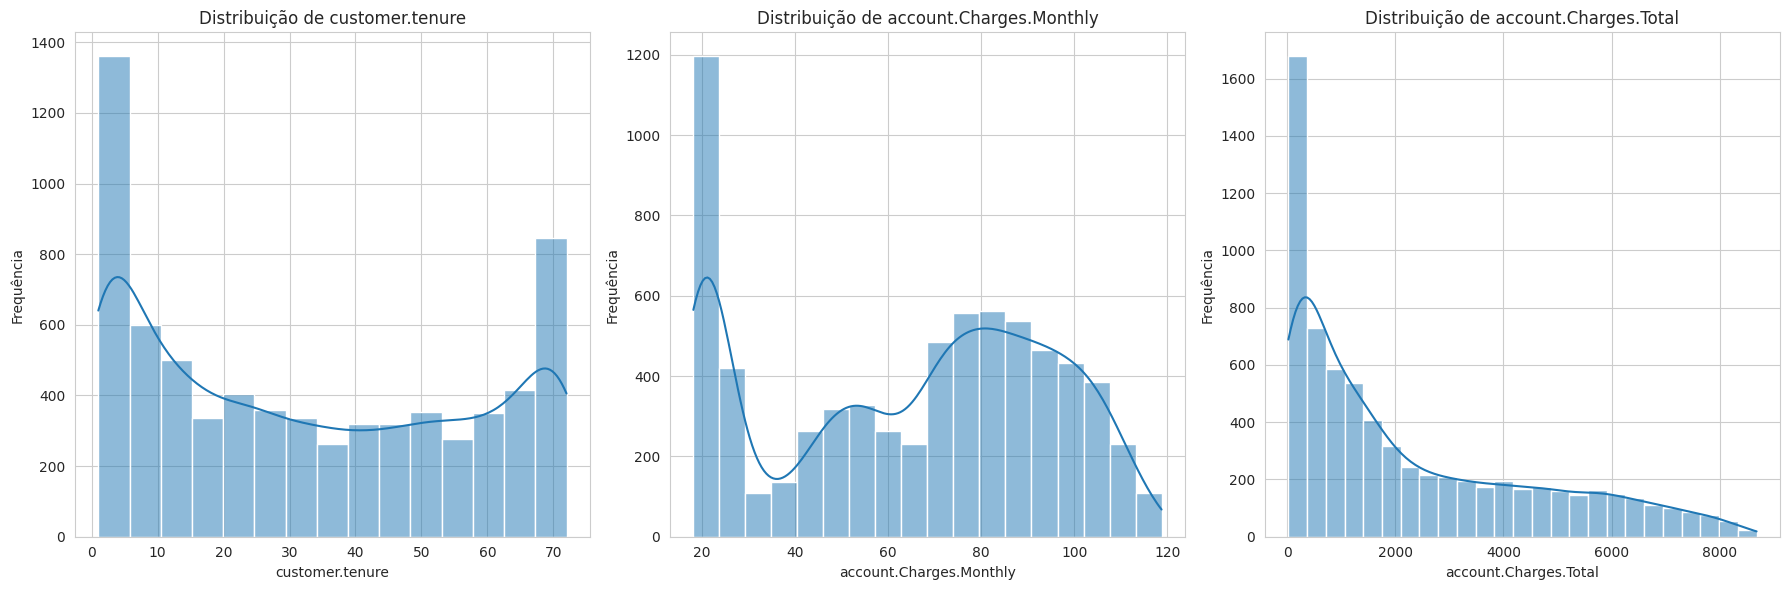

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid') # Garante o estilo visual

# --- Análise Visual da Distribuição de Variáveis Numéricas Contínuas ---
print("\n--- Visualizando a Distribuição de Variáveis Numéricas Chave ---")

# Colunas numéricas a serem analisadas
colunas_continuas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Cria subplots para cada variável contínua
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 linha, 3 colunas de gráficos

# Plota a distribuição (histograma com KDE) para cada coluna
for i, coluna in enumerate(colunas_continuas):
    sns.histplot(data=df_transformado, x=coluna, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição de {coluna}')
    axes[i].set_xlabel(coluna)
    axes[i].set_ylabel('Frequência')

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

**Interpretação dos Gráficos de Distribuição**

Os histogramas com Kernel Density Estimates (KDE) fornecem uma visualização da distribuição das variáveis numéricas contínuas: `customer.tenure`, `account.Charges.Monthly` e `account.Charges.Total`.

- **Distribuição de customer.tenure:** Este gráfico mostra uma distribuição bimodal. Há um pico significativo em clientes com baixo tempo de contrato (entre 0 e 10 meses), indicando um grande número de clientes novos ou que churnam rapidamente. Há outro pico em clientes com alto tempo de contrato (próximo a 70 meses), representando clientes de longa data e leais. A "queda" no meio sugere que menos clientes permanecem por um período intermediário.

- **Distribuição de account.Charges.Monthly:** A distribuição dos gastos mensais parece mais complexa, com múltiplos picos. Há um pico inicial em torno de $20, representando clientes com serviços mais básicos. Em seguida, a distribuição se espalha com picos e vales, refletindo provavelmente diferentes combinações de serviços e pacotes que os clientes contrataram, resultando em diferentes faixas de valores mensais.

- **Distribuição de account.Charges.Total:** O gráfico de gasto total mostra uma distribuição fortemente assimétrica à direita (positiva). A grande maioria dos clientes tem um gasto total relativamente baixo (concentrado perto de zero), enquanto um número menor de clientes tem gastos totais muito altos, estendendo a cauda da distribuição para a direita. Isso é esperado e consistente com a estatística descritiva que mostrou a média sendo puxada para cima por esses valores mais altos, e o 1º quartil e a mediana serem muito menores que a média.

# **(Gráfico) Análise Bivariada de Variáveis Numéricas vs. Churn (Box Plots por Categoria)**


--- Comparando Variáveis Numéricas entre Clientes com e sem Churn ---


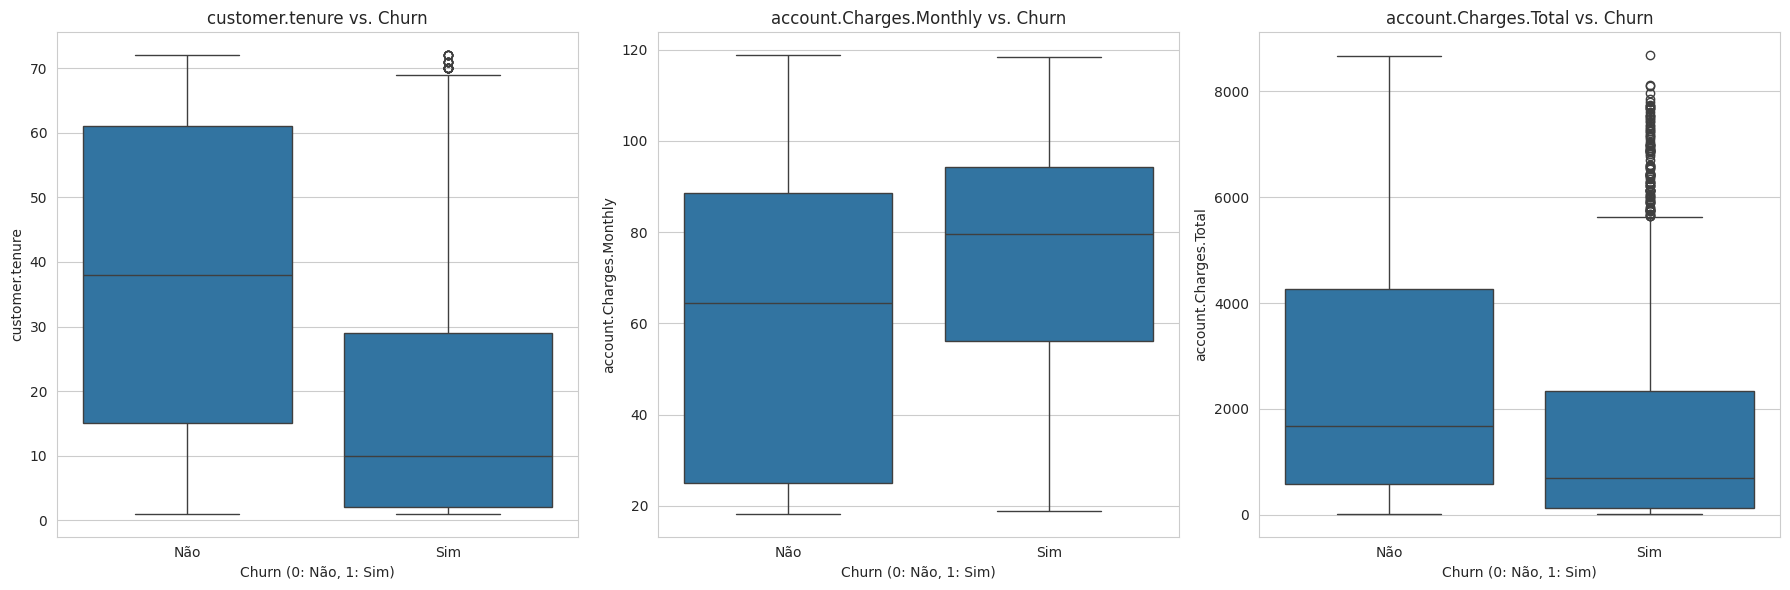

In [47]:
# --- Análise de Variáveis Numéricas por Churn (Box Plots) ---
print("\n--- Comparando Variáveis Numéricas entre Clientes com e sem Churn ---")

# Colunas numéricas contínuas para análise
colunas_continuas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# Cria subplots para cada variável contínua
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plota o box plot para cada coluna, comparando 'Churn' (0: Não Churn, 1: Churn)
for i, coluna in enumerate(colunas_continuas):
    sns.boxplot(data=df_transformado, x='Churn', y=coluna, ax=axes[i])
    axes[i].set_title(f'{coluna} vs. Churn')
    axes[i].set_xlabel('Churn (0: Não, 1: Sim)')
    axes[i].set_ylabel(coluna)
    # Opcional: ajuste o rótulo do eixo x se preferir 'Sim'/'Não' em vez de 0/1
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Não', 'Sim'])


plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

**Interpretação dos Box Plots: Variáveis Numéricas vs. Churn**

Os box plots acima comparam a distribuição das variáveis numéricas contínuas (`customer.tenure`, `account.Charges.Monthly`, e `account.Charges.Total`) para clientes que não churnaram (Churn = 0) e clientes que churnaram (Churn = 1).

- **customer.tenure vs. Churn:** O box plot para `customer.tenure` mostra uma diferença clara entre os grupos. Clientes que não churnaram (`Churn = 0`) têm uma mediana e um intervalo interquartil significativamente maiores, indicando que eles tendem a ter contratos mais longos. Em contraste, clientes que churnaram (`Churn = 1`) têm uma mediana de `tenure` muito menor e a maior parte de seus dados concentrada em valores baixos de `tenure`. Isso reforça a forte correlação negativa vista no heatmap e sugere que clientes com menor tempo de contrato são muito mais propensos a churnar.

- **account.Charges.Monthly vs. Churn:** O box plot para `account.Charges.Monthly` mostra que clientes que churnaram (`Churn = 1`) tendem a ter gastos mensais ligeiramente mais altos do que aqueles que não churnaram (`Churn = 0`). A mediana e o intervalo interquartil para o grupo de Churn são um pouco maiores. Isso é consistente com a correlação positiva moderada vista no heatmap e pode indicar que clientes com contas mensais mais altas percebem menos valor ou são mais sensíveis ao preço.

- **account.Charges.Total vs. Churn:** O box plot para `account.Charges.Total` mostra uma diferença marcante. Clientes que não churnaram (`Churn = 0`) têm um gasto total mediano e um intervalo interquartil muito maiores. Isso se alinha com a forte correlação negativa vista no heatmap e sugere que clientes com maior gasto total ao longo do tempo são significativamente menos propensos a churnar. O box plot para o grupo de Churn está concentrado em valores mais baixos de gasto total.

**Conclusão:** Os box plots visualmente confirmam as relações identificadas pelas estatísticas descritivas e pelo heatmap. `customer.tenure` e `account.Charges.Total` são claramente menores para clientes que churnam, enquanto `account.Charges.Monthly` tende a ser um pouco maior. Estas variáveis são fortes indicadores da propensão ao churn.

# **(Gráfico) Análise de Outras Variáveis Categóricas (Tabelas de Contingência e Gráficos de Barras Empilhados/Agrupados)**


--- Analisando a Taxa de Churn para Outras Variáveis Categóricas ---


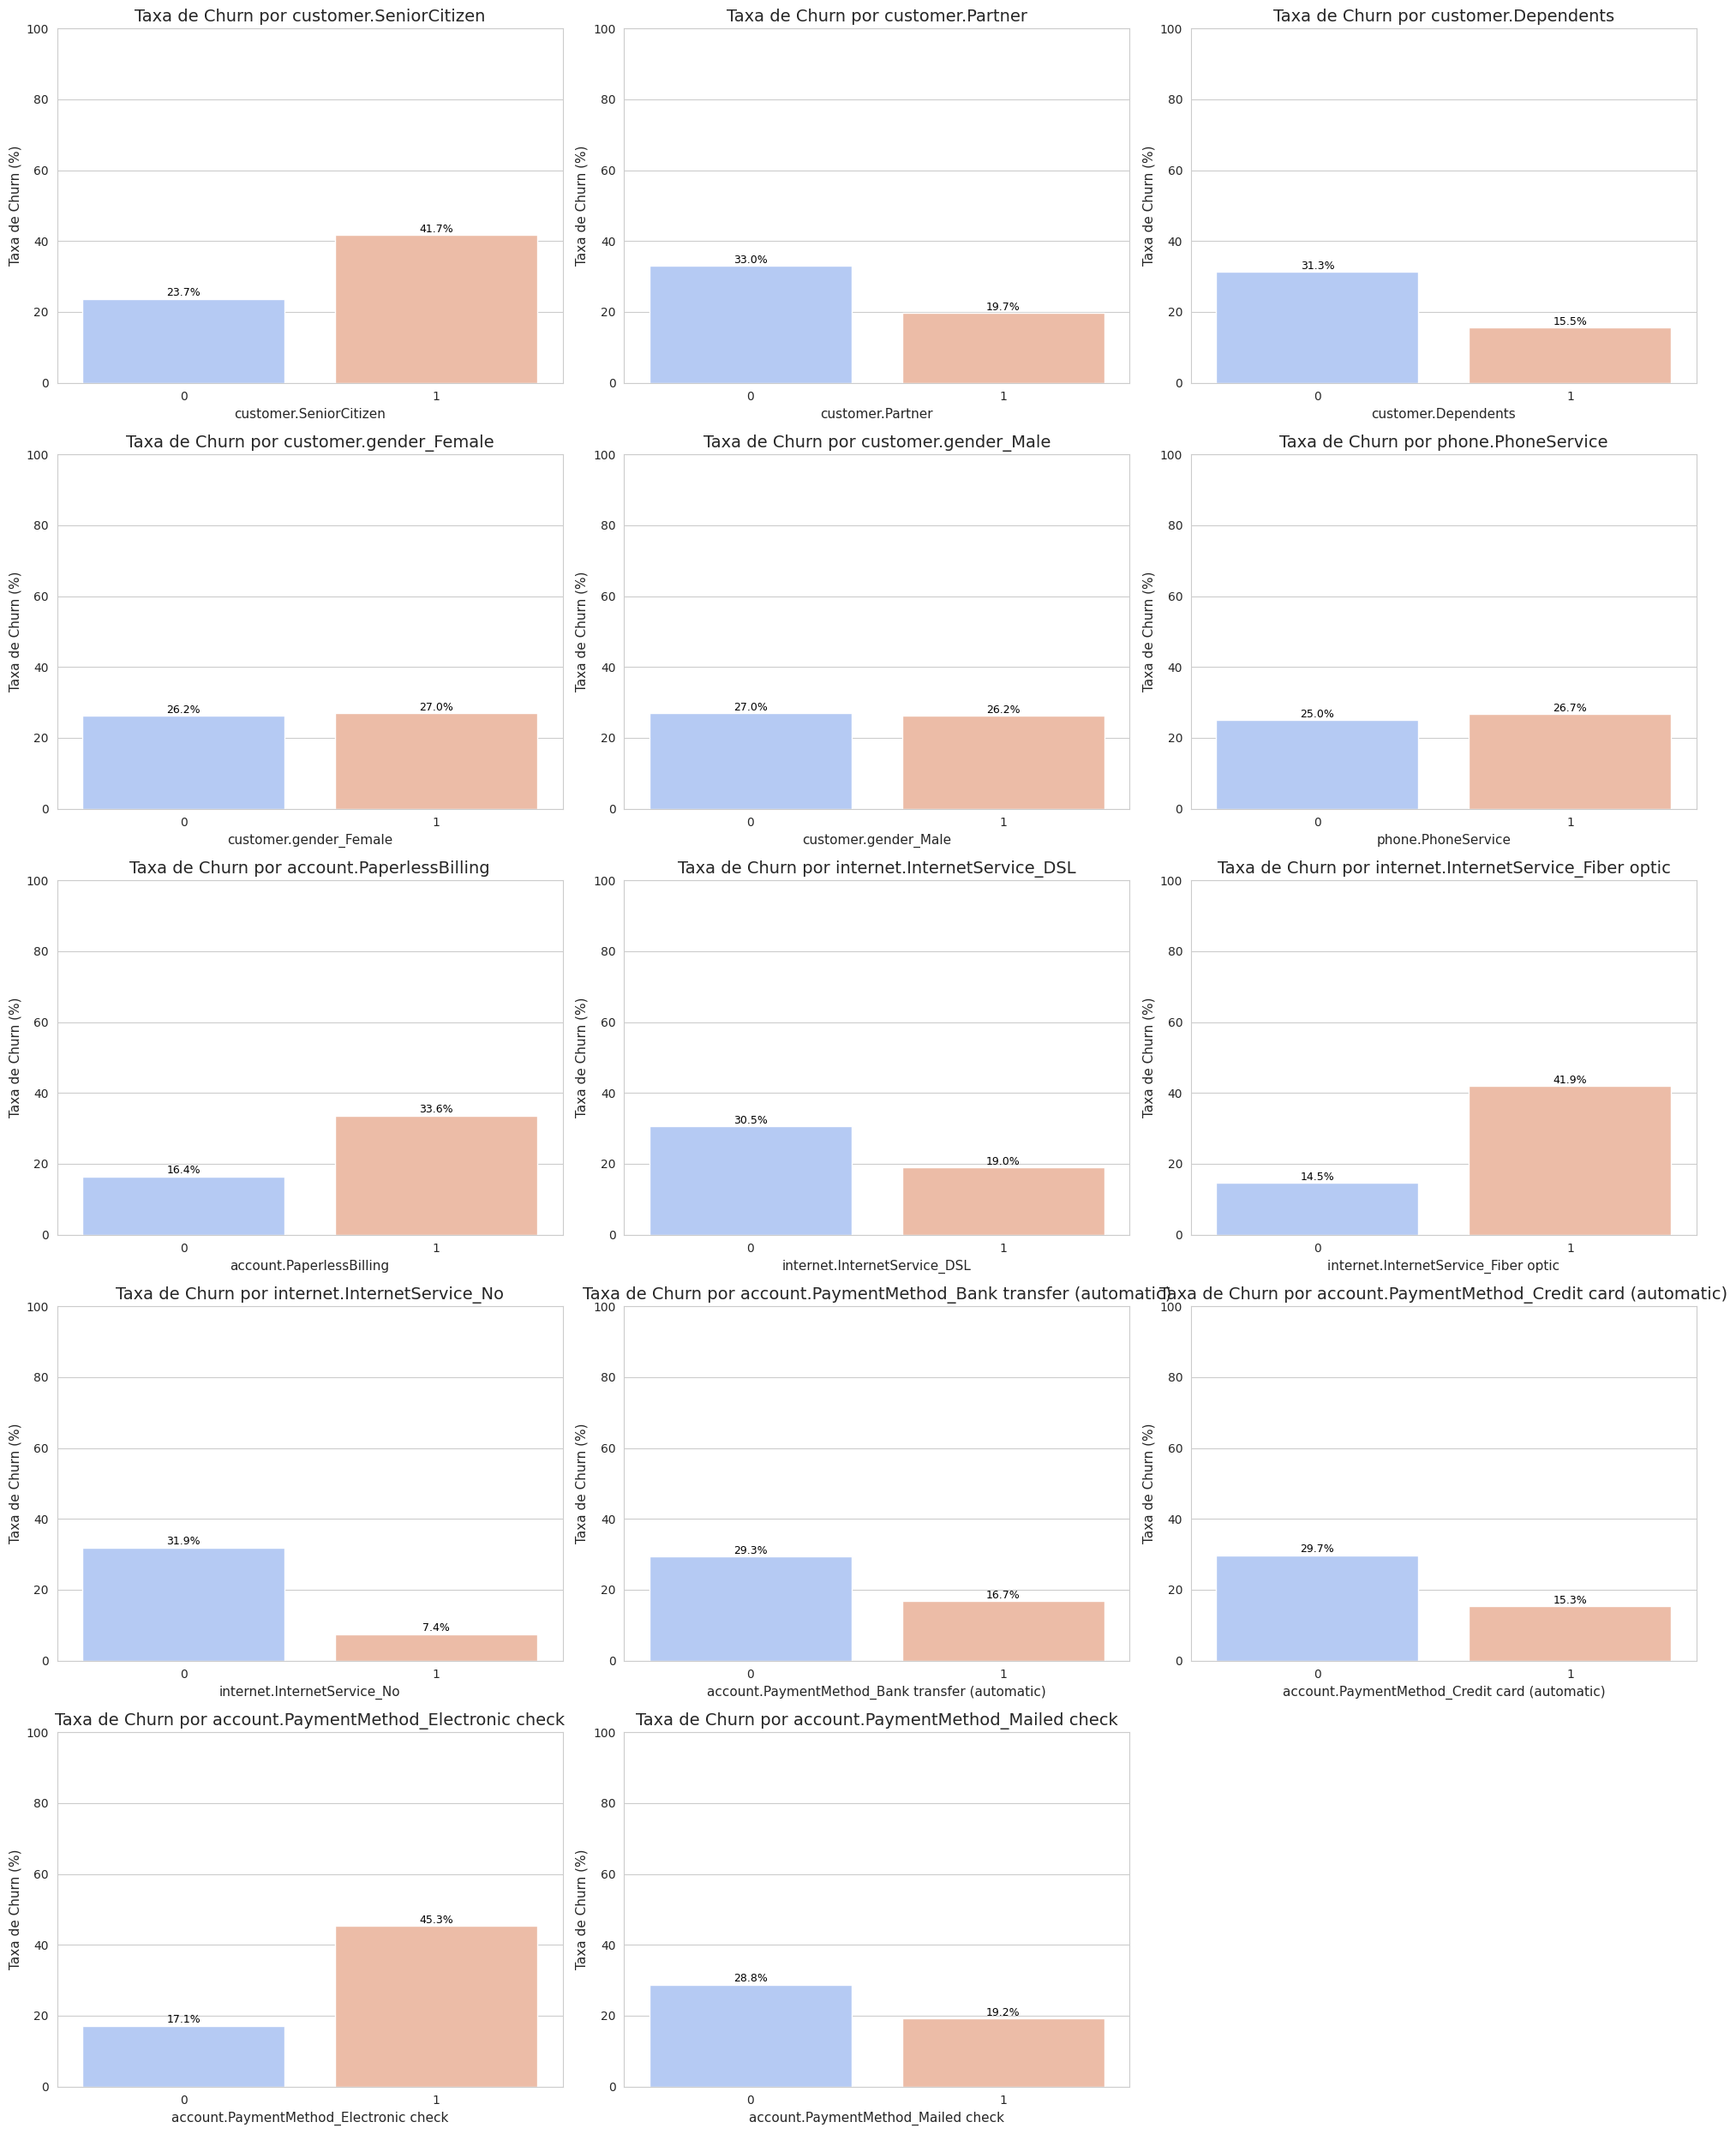

In [49]:
print("\n--- Analisando a Taxa de Churn para Outras Variáveis Categóricas ---")

categorical_cols_for_churn = [
    'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.gender_Female', 'customer.gender_Male',
    'phone.PhoneService', 'account.PaperlessBilling',
    'internet.InternetService_DSL', 'internet.InternetService_Fiber optic', 'internet.InternetService_No',
    'account.PaymentMethod_Bank transfer (automatic)', 'account.PaymentMethod_Credit card (automatic)', 'account.PaymentMethod_Electronic check', 'account.PaymentMethod_Mailed check'
]

plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols_for_churn):
    if col in df_transformado.columns:
        churn_rate_by_cat = df_transformado.groupby(col)['Churn'].mean().mul(100).reset_index(name='Taxa_Churn_%')

        plt.subplot(5, 3, i + 1) # Ajuste o grid de subplots conforme necessário
        ax = sns.barplot(x=col, y='Taxa_Churn_%', data=churn_rate_by_cat, palette='coolwarm', hue=col, legend=False)
        plt.title(f'Taxa de Churn por {col}', fontsize=14)
        plt.xlabel(col, fontsize=11)
        plt.ylabel('Taxa de Churn (%)', fontsize=11)
        plt.ylim(0, 100) # Garante que o Y vá até 100%

        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                        textcoords='offset points')
    else:
        print(f"  AVISO: Coluna '{col}' não encontrada para análise.")

plt.tight_layout()
plt.show()

**Interpretação dos Gráficos de Churn por Categoria**

Os gráficos de barras acima exibem a taxa de churn para diferentes categorias dentro de várias variáveis categóricas. Analisando cada gráfico, podemos identificar quais grupos de clientes têm maior ou menor probabilidade de churn:

- **customer.SeniorCitizen:** Clientes idosos (SeniorCitizen = 1) têm uma taxa de churn visivelmente maior (41.7%) do que clientes não idosos (SeniorCitizen = 0) (23.7%). Isso sugere que a idade pode ser um fator de risco.
- **customer.Partner:** Clientes sem parceiro (Partner = 0) têm uma taxa de churn mais alta (33.0%) do que clientes com parceiro (Partner = 1) (19.7%). Ter um parceiro parece estar associado a menor churn.
- **customer.Dependents:** Similarmente, clientes sem dependentes (Dependents = 0) apresentam uma taxa de churn maior (31.3%) do que clientes com dependentes (Dependents = 1) (15.5%). Ter dependentes também parece contribuir para a retenção.
- **customer.gender_Female / customer.gender_Male:** A taxa de churn é muito semelhante entre homens (26.2%) e mulheres (27.0%). O gênero não parece ser um forte preditor de churn.
- **phone.PhoneService:** Clientes com serviço telefônico (PhoneService = 1) têm uma taxa de churn ligeiramente maior (26.7%) do que clientes sem serviço telefônico (PhoneService = 0) (25.0%), mas a diferença não é grande.
- **account.PaperlessBilling:** Clientes com fatura online (PaperlessBilling = 1) têm uma taxa de churn significativamente maior (33.6%) do que aqueles com fatura em papel (PaperlessBilling = 0) (16.4%). Isso é interessante e pode estar relacionado a outros fatores ou à forma como a fatura online é apresentada.
- **internet.InternetService_DSL / internet.InternetService_Fiber optic / internet.InternetService_No:** Clientes com Fibra Ótica (41.9%) têm a maior taxa de churn, seguidos por DSL (18.9%) e, notavelmente, aqueles sem serviço de internet (7.4%) têm a menor taxa de churn. Isso confirma a observação do heatmap e destaca a Fibra Ótica como um segmento de alto risco.
- **account.PaymentMethod_Bank transfer (automatic) / account.PaymentMethod_Credit card (automatic) / account.PaymentMethod_Electronic check / account.PaymentMethod_Mailed check:** O método de pagamento "Cheque Eletrônico" tem a maior taxa de churn (45.3%), o que é consistente com a correlação positiva vista no heatmap. Os outros métodos de pagamento automático (Transferência Bancária e Cartão de Crédito) têm taxas de churn menores (16.7% e 15.3%, respectivamente), enquanto o "Cheque por Correio" tem uma taxa intermediária (19.2%).

**Conclusão:** Estes gráficos detalham as diferenças de churn dentro de cada categoria, reforçando muitos dos insights do heatmap. Variáveis como `SeniorCitizen`, `Partner`, `Dependents`, `PaperlessBilling`, `InternetService` (especialmente Fibra Ótica e Sem Internet) e `PaymentMethod` (especialmente Cheque Eletrônico) mostram diferenças notáveis na taxa de churn e são importantes para entender o perfil do cliente propenso a cancelar.

# Salvando Nova Base de Dado

In [51]:
# Salvar o DataFrame transformado em um arquivo CSV
# index=True para incluir o customerID como coluna no CSV
df_transformado.to_csv('telecom_data_transformed.csv', index=True)

print("DataFrame transformado salvo como 'telecom_data_transformed.csv'")

DataFrame transformado salvo como 'telecom_data_transformed.csv'
